##Install the necessary packages
Import you data and perform basic data exploration phaseDisplay general information about the datasetCreate a pandas profiling reports to gain insights into the datasetHandle Missing and corrupted valuesRemove duplicates, if they existHandle outliers, if they existEncode categorical features
Based on the previous data exploration train and test a machine learning classifier
Create a streamlit application (locally) and add input fields for your features and a validation button at the end of the form
Import your ML model into the streamlit application and start making predictions given the provided features values
Deploy your application on Streamlit share:Create a github and a streamlit share accountsCreate a new git repoUpload your local code to the newly created git repolog in 

David Makanjuola 21:09
Dataset description: The dataset contains demographic information and what financial services are used by approximately 33,600 individuals across East Africa. The ML model role is to predict which individuals are most likely to have or use a bank account.
The term financial inclusion means:  individuals and businesses have access to useful and affordable financial products and services that meet their needs – transactions, payments, savings, credit and insurance – 

#Import data and perform basic data exploration 

In [70]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [71]:
import joblib

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [59]:
from sklearn.metrics import classification_report

In [4]:
file_path = "Financial_inclusion_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.info

<bound method DataFrame.info of       country  year       uniqueid bank_account location_type  \
0       Kenya  2018     uniqueid_1          Yes         Rural   
1       Kenya  2018     uniqueid_2           No         Rural   
2       Kenya  2018     uniqueid_3          Yes         Urban   
3       Kenya  2018     uniqueid_4           No         Rural   
4       Kenya  2018     uniqueid_5           No         Urban   
...       ...   ...            ...          ...           ...   
23519  Uganda  2018  uniqueid_2113           No         Rural   
23520  Uganda  2018  uniqueid_2114           No         Rural   
23521  Uganda  2018  uniqueid_2115           No         Rural   
23522  Uganda  2018  uniqueid_2116           No         Urban   
23523  Uganda  2018  uniqueid_2117           No         Rural   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               3                 24   
1                   No               5                 70   
2   

In [6]:
#check missing variable 
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [10]:
df.shape

(23524, 13)

In [11]:
#check duplicates 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [12]:
#describe 
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [13]:
#check all numerical variables for outliers 
df.age_of_respondent.value_counts()

age_of_respondent
30    1056
35     836
25     792
28     748
32     715
      ... 
91       5
93       4
96       3
99       2
97       1
Name: count, Length: 85, dtype: int64

(array([4809., 5480., 4707., 2785., 2164., 1733.,  965.,  640.,  189.,
          52.]),
 array([ 16. ,  24.4,  32.8,  41.2,  49.6,  58. ,  66.4,  74.8,  83.2,
         91.6, 100. ]),
 <BarContainer object of 10 artists>)

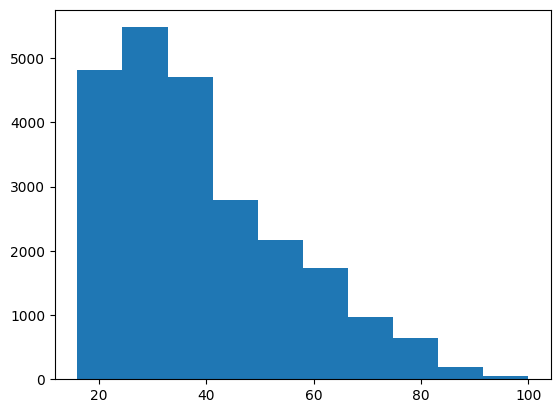

In [14]:
#check numerical data fro outlier 
plt.hist(df["age_of_respondent"])

In [16]:
#numerical variable "household size"
df.household_size.value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

(array([8.286e+03, 7.394e+03, 4.949e+03, 2.151e+03, 5.530e+02, 1.370e+02,
        3.500e+01, 1.500e+01, 2.000e+00, 2.000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

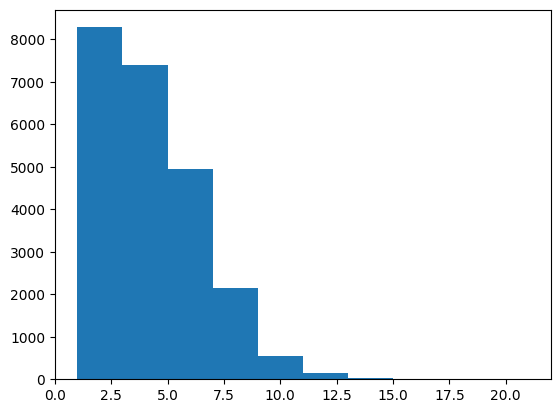

In [17]:
plt.hist(df.household_size)

In [18]:
#check categorical variable
cat_col = df.select_dtypes("object")
num_col = df.select_dtypes("number")

print(cat_col.columns)
print(num_col.columns)

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')
Index(['year', 'household_size', 'age_of_respondent'], dtype='object')


In [19]:
cat_col.columns

Index(['country', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'gender_of_respondent', 'relationship_with_head',
       'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [20]:
num_col.columns

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

In [21]:
df.country.value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

In [22]:
#encoding the country 
coun_enc = LabelEncoder()
df["country"]=coun_enc.fit_transform(df['country'])

coun_enc.classes_

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [23]:
df.country.value_counts()

country
1    8735
2    6620
0    6068
3    2101
Name: count, dtype: int64

In [64]:
#save country
path = "country_encoder.sav"
joblib.dump(coun_enc, path)

['country_encoder.sav']

In [24]:
#encodung gender 
df.gender_of_respondent.value_counts()

gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64

In [25]:
gen_enc = LabelEncoder()
df["gender_of_respondent"]=gen_enc.fit_transform(df['gender_of_respondent'])

gen_enc.classes_

array(['Female', 'Male'], dtype=object)

In [26]:
df.gender_of_respondent.value_counts()

gender_of_respondent
0    13877
1     9647
Name: count, dtype: int64

In [63]:
#joblib gender
path = 'genc_encoder.sav'
joblib.dump(gen_enc,path)

['genc_encoder.sav']

In [27]:
#country encoding 
coun_enc = LabelEncoder()
df["country"]=coun_enc.fit_transform(df['country'])
coun_enc.classes_

array([0, 1, 2, 3])

In [28]:
df.country.value_counts()

country
1    8735
2    6620
0    6068
3    2101
Name: count, dtype: int64

In [37]:
df.uniqueid.value_counts()

uniqueid
uniqueid_771     4
uniqueid_2052    4
uniqueid_2053    4
uniqueid_2054    4
uniqueid_2055    4
                ..
uniqueid_8706    1
uniqueid_8707    1
uniqueid_8708    1
uniqueid_8709    1
uniqueid_8699    1
Name: count, Length: 8735, dtype: int64

In [29]:
df.bank_account.value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In [30]:
#encoding bank account
ba_enc = LabelEncoder()
df["bank_account"]=ba_enc.fit_transform(df['bank_account'])

In [31]:
df.bank_account.value_counts()

bank_account
0    20212
1     3312
Name: count, dtype: int64

In [32]:
df.location_type.value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

In [33]:
#encode location_type 
loc_enc = LabelEncoder()
df["location_type"]=loc_enc.fit_transform(df['location_type'])


In [34]:
df.location_type.value_counts()

location_type
0    14343
1     9181
Name: count, dtype: int64

In [ ]:
#joblib location

path = 'location_encoder.sav'
joblib.dump(loc_enc,path)

['location_encoder.sav']

In [35]:
df.education_level.value_counts

<bound method IndexOpsMixin.value_counts of 0                    Secondary education
1                    No formal education
2        Vocational/Specialised training
3                      Primary education
4                      Primary education
                      ...               
23519                No formal education
23520                Secondary education
23521                  Primary education
23522                Secondary education
23523                Secondary education
Name: education_level, Length: 23524, dtype: object>

In [36]:
#encoding education variable
educ_enc = LabelEncoder()
df["education_level"]=educ_enc.fit_transform(df['education_level'])

educ_enc.classes_

array(['No formal education', 'Other/Dont know/RTA', 'Primary education',
       'Secondary education', 'Tertiary education',
       'Vocational/Specialised training'], dtype=object)

In [37]:
#save educ_enc
path = 'educ_encoder.sav'
joblib.dump(educ_enc,path)

['educ_encoder.sav']

In [38]:
df.relationship_with_head.value_counts()

relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64

In [39]:
#encodeing relationship with head 

rel_enc = LabelEncoder()
df["relationship_with_head"]=rel_enc.fit_transform(df['relationship_with_head'])

rel_enc.classes_

array(['Child', 'Head of Household', 'Other non-relatives',
       'Other relative', 'Parent', 'Spouse'], dtype=object)

In [40]:
df.relationship_with_head.value_counts()

relationship_with_head
1    12831
5     6520
0     2229
4     1086
3      668
2      190
Name: count, dtype: int64

In [66]:
#joblib relationship with head 
path = 'rel_head_encoder.sav'
joblib.dump(rel_enc,path)

['rel_head_encoder.sav']

In [41]:
#encoding marital status 
df.marital_status.value_counts()

marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64

In [42]:
marit_enc = LabelEncoder()
df["marital_status"]=marit_enc.fit_transform(df['marital_status'])

marit_enc.classes_

array(['Divorced/Seperated', 'Dont know', 'Married/Living together',
       'Single/Never Married', 'Widowed'], dtype=object)

In [43]:
df.marital_status.value_counts()

marital_status
2    10749
3     7983
4     2708
0     2076
1        8
Name: count, dtype: int64

In [69]:
#joblib marital status 
path = 'marit_encoder.sav'
joblib.dump(marit_enc,path)

['marit_encoder.sav']

In [44]:
#encoding 
df.cellphone_access.value_counts()

cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64

In [45]:
cell_enc=LabelEncoder()
df.cellphone_access=cell_enc.fit_transform(df.cellphone_access)

cell_enc.classes_

array(['No', 'Yes'], dtype=object)

In [46]:
df.cellphone_access.value_counts()

cellphone_access
1    17454
0     6070
Name: count, dtype: int64

In [68]:
#joblib cellphone access
path = 'cellacess_encoder.sav'
joblib.dump(cell_enc,path)

['cellacess_encoder.sav']

In [47]:
#encodeing jobtype

df.job_type.value_counts()

job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64

In [50]:
#encoding jobtype
jobtype_enc = LabelEncoder()
df.job_type=jobtype_enc.fit_transform(df.job_type)

jobtype_enc.classes_

array(['Dont Know/Refuse to answer', 'Farming and Fishing',
       'Formally employed Government', 'Formally employed Private',
       'Government Dependent', 'Informally employed', 'No Income',
       'Other Income', 'Remittance Dependent', 'Self employed'],
      dtype=object)

In [67]:
#joblib jobtype 
path = 'jobtype_encoder.sav'
joblib.dump(jobtype_enc,path)

['jobtype_encoder.sav']

In [72]:
#encode year 
df.year.value_counts()

year
2016    8735
2018    8169
2017    6620
Name: count, dtype: int64

In [76]:
#encode year 
year_enc= LabelEncoder()
df.year= yearenc.fit_transform(df.year)


In [77]:
df.year.value_counts()

year
0    8735
2    8169
1    6620
Name: count, dtype: int64

In [78]:
df.head()


,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,1,0,1,3,24,0,5,2,3,9
1,0,2,0,0,0,5,70,0,1,4,0,4
2,0,2,1,1,1,5,26,1,3,3,5,9
3,0,2,0,0,1,5,34,0,1,2,2,3
4,0,2,0,1,0,8,26,1,0,3,2,5


In [53]:
#drop unique id 

df.drop("uniqueid", axis=1, inplace=True)

In [54]:
df.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,1,0,1,3,24,0,5,2,3,9
1,0,2018,0,0,0,5,70,0,1,4,0,4
2,0,2018,1,1,1,5,26,1,3,3,5,9
3,0,2018,0,0,1,5,34,0,1,2,2,3
4,0,2018,0,1,0,8,26,1,0,3,2,5


In [56]:
##Split into feature and target variable
x = df.drop(["bank_account"], axis = 1)
y = df.bank_account

#Splitting into train 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=43)

In [60]:
#mpodel random forest 
model = RandomForestClassifier()

model.fit(x_train,  y_train)
y_pred =model.predict(x_test)
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4032
           1       0.55      0.39      0.46       673

    accuracy                           0.87      4705
   macro avg       0.73      0.67      0.69      4705
weighted avg       0.85      0.87      0.86      4705



In [61]:
x.describe().style.format("{:.2f}")

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524.00,23524.00,23524.00,23524.00,23524.00,23524.00,23524.00,23524.00,23524.00,23524.00,23524.00
mean,1.20,2016.98,0.39,0.74,3.80,38.81,0.41,2.22,2.39,1.99,5.43
std,0.93,0.85,0.49,0.44,2.23,16.52,0.49,1.89,1.00,1.21,3.09
min,0.00,2016.00,0.00,0.00,1.00,16.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,2016.00,0.00,0.00,2.00,26.00,0.00,1.00,2.00,2.00,2.00
50%,1.00,2017.00,0.00,1.00,3.00,35.00,0.00,1.00,2.00,2.00,5.00
75%,2.00,2018.00,1.00,1.00,5.00,49.00,1.00,5.00,3.00,3.00,9.00
max,3.00,2018.00,1.00,1.00,21.00,100.00,1.00,5.00,4.00,5.00,9.00


In [62]:
#save model
path = "rf_project2_model.sav"
joblib.dump(model, path)

['rf_project2_model.sav']

In [ ]:
country_enc = joblib.load ("country_encoder.sav")
educ_enc = joblib.load("educ_encoder.sav")
gen_enc = joblib.load("genc_encoder.sav")
jobtype_enc = joblib.load("jobtype_encoder.sav")
loc_enc = joblib.load("jobtype_encoder.sav")
rel_enc = joblib.load("rel_head_encoder.sav")
